In [39]:
from datasets import load_from_disk

import h5py
import torch
import numpy as np
import matplotlib.pyplot as plt

In [40]:
ds = load_from_disk('WikiArt_damaged')

Shape: (100, 3, 256, 256)


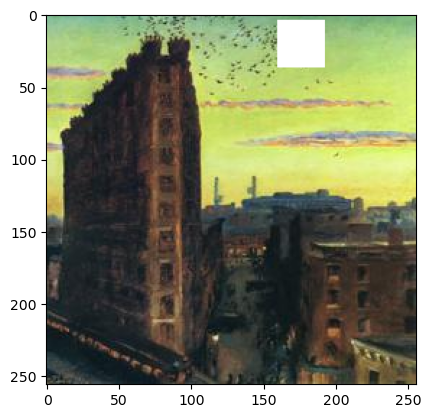

In [41]:
with h5py.File('damaged_images_tensor_data.h5', 'r') as h5f:
    image_data = h5f['image'][:100]
    # image_tensor = torch.tensor(image_data, dtype=torch.uint8)

print(f'Shape: {image_data.shape}')

plt.imshow(image_data[0].transpose(1, 2, 0))
plt.show()

In [42]:
def image_index(idx: int) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    image = np.array(ds[idx]['image'])
    image_damaged = image_data[idx].transpose(1, 2, 0)
    diff = image - image_damaged
    return image, image_damaged, diff

[[[ 81  77  68]
  [ 86  82  73]
  [ 79  72  62]
  ...
  [180 167 151]
  [176 162 149]
  [171 157 144]]

 [[ 55  51  42]
  [ 52  48  39]
  [ 62  55  45]
  ...
  [179 166 150]
  [177 164 148]
  [176 163 147]]

 [[ 80  75  69]
  [ 61  56  50]
  [ 50  43  35]
  ...
  [172 156 140]
  [173 157 141]
  [175 159 143]]

 ...

 [[ 27  16  22]
  [ 26  15  21]
  [ 24  13  17]
  ...
  [ 34  25  26]
  [ 33  24  25]
  [ 29  20  21]]

 [[ 28  17  23]
  [ 27  16  22]
  [ 25  14  18]
  ...
  [ 37  27  26]
  [ 37  27  26]
  [ 34  24  23]]

 [[ 29  18  24]
  [ 28  17  23]
  [ 26  15  19]
  ...
  [ 38  28  27]
  [ 41  31  30]
  [ 40  30  29]]]


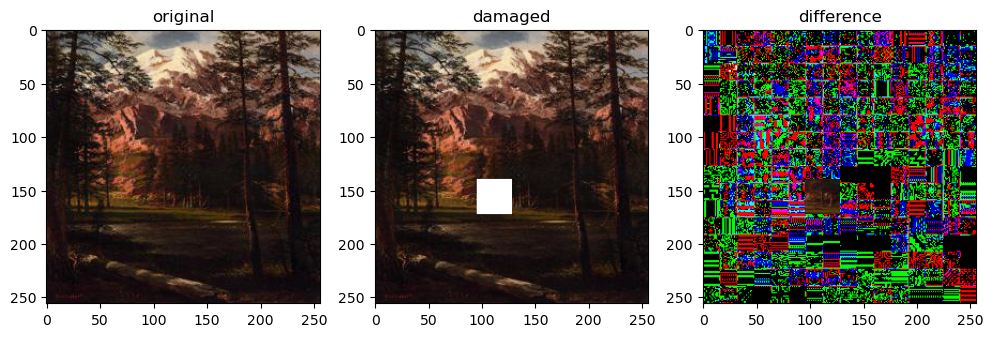

In [48]:
image, image_damaged, diff = image_index(53)

print(image)

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(image)
ax[0].set_title('original')
ax[1].imshow(image_damaged)
ax[1].set_title('damaged')
ax[2].imshow(diff)
ax[2].set_title('difference')
plt.show()